In [1]:
import pandas as pd
import numpy as np

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from pandas_datareader import data,wb

In [3]:
from bs4 import BeautifulSoup

In [4]:
import requests

In [7]:
#page = requests.get("website").text

In [8]:
#soup = BeautifulSoup(page,'html.parser')

In [9]:
import yfinance as yf

In [10]:
apple = yf.Ticker("AAPL")

In [13]:
apple.info

{'zip': '95014',
 'sector': 'Technology',
 'fullTimeEmployees': 100000,
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; AirPods Max, an over-ear wireless headphone; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, and iPod touch. Further, it provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience wit

In [15]:
apple_info = apple.info

In [16]:
apple_info['country']

'United States'

In [17]:
apple_share_price_data = apple.history(period='max')

In [18]:
apple_share_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12,0.100326,0.100762,0.100326,0.100326,469033600,0.0,0.0
1980-12-15,0.095528,0.095528,0.095092,0.095092,175884800,0.0,0.0
1980-12-16,0.088548,0.088548,0.088112,0.088112,105728000,0.0,0.0
1980-12-17,0.090293,0.090729,0.090293,0.090293,86441600,0.0,0.0
1980-12-18,0.092911,0.093347,0.092911,0.092911,73449600,0.0,0.0


<AxesSubplot:xlabel='Date'>

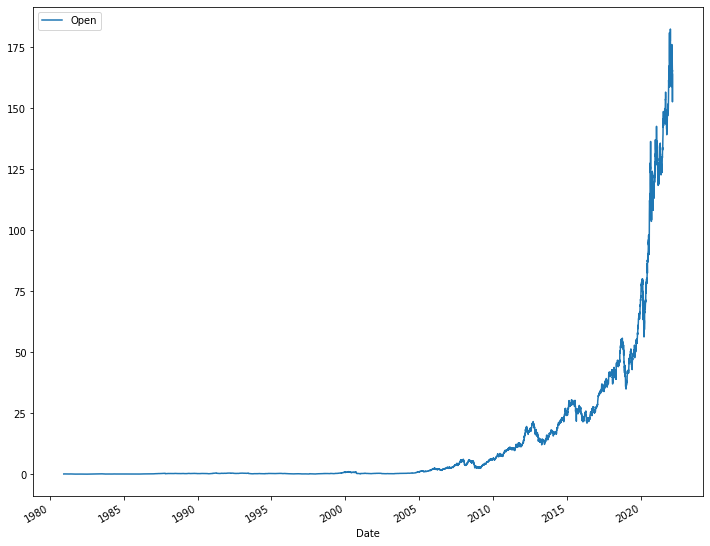

In [26]:
apple_share_price_data.reset_index().plot(x='Date',y='Open',figsize=(12,10))

In [27]:
apple.dividends

Date
1987-05-11    0.000536
1987-08-10    0.000536
1987-11-17    0.000714
1988-02-12    0.000714
1988-05-16    0.000714
                ...   
2021-02-05    0.205000
2021-05-07    0.220000
2021-08-06    0.220000
2021-11-05    0.220000
2022-02-04    0.220000
Name: Dividends, Length: 74, dtype: float64

<AxesSubplot:xlabel='Date'>

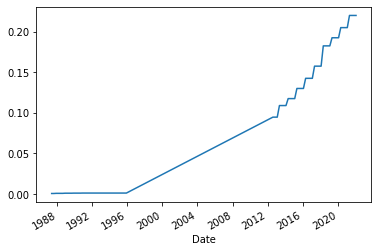

In [28]:
apple.dividends.plot()

In [29]:
amd = yf.Ticker('AMD')

In [32]:
amd.info

{'zip': '95054',
 'sector': 'Technology',
 'fullTimeEmployees': 15500,
 'longBusinessSummary': 'Advanced Micro Devices, Inc. operates as a semiconductor company worldwide. The company operates in two segments, Computing and Graphics; and Enterprise, Embedded and Semi-Custom. Its products include x86 microprocessors as an accelerated processing unit, chipsets, discrete and integrated graphics processing units (GPUs), data center and professional GPUs, and development services; and server and embedded processors, and semi-custom System-on-Chip (SoC) products, development services, and technology for game consoles. The company provides processors for desktop and notebook personal computers under the AMD Ryzen, AMD Ryzen PRO, Ryzen Threadripper, Ryzen Threadripper PRO, AMD Athlon, AMD Athlon PRO, AMD FX, AMD A-Series, and AMD PRO A-Series processors brands; discrete GPUs for desktop and notebook PCs under the AMD Radeon graphics, AMD Embedded Radeon graphics brands; and professional graphi

In [34]:
amd.info['country']

'United States'

In [37]:
amd.info['sector']

'Technology'

In [38]:
amd_stocks_data = amd.history(period='max')

In [40]:
amd_stocks_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-03-17,0.0,3.302083,3.125000,3.145833,219600,0,0.0
1980-03-18,0.0,3.125000,2.937500,3.031250,727200,0,0.0
1980-03-19,0.0,3.083333,3.020833,3.041667,295200,0,0.0
1980-03-20,0.0,3.062500,3.010417,3.010417,159600,0,0.0
1980-03-21,0.0,3.020833,2.906250,2.916667,130800,0,0.0


In [41]:
#using webscraping now

In [42]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/netflix_data_webpage.html'
data = requests.get(url).text

In [43]:
soup = BeautifulSoup(data,'html5lib')

In [44]:
netflix_data = pd.DataFrame(columns=["Date", "Open", "High", "Low", "Close", "Volume"])

# First we isolate the body of the table which contains all the information
# Then we loop through each row and find all the column values for each row
for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    Open = col[1].text
    high = col[2].text
    low = col[3].text
    close = col[4].text
    adj_close = col[5].text
    volume = col[6].text
    
    # Finally we append the data of each row to the table
    netflix_data = netflix_data.append({"Date":date, "Open":Open, "High":high, "Low":low, "Close":close, "Adj Close":adj_close, "Volume":volume}, ignore_index=True)    

C:\Users\DELL LATITUDE 3550\AppData\Local\Temp\ipykernel_24032\588127528.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  netflix_data = netflix_data.append({"Date":date, "Open":Open, "High":high, "Low":low, "Close":close, "Adj Close":adj_close, "Volume":volume}, ignore_index=True)
C:\Users\DELL LATITUDE 3550\AppData\Local\Temp\ipykernel_24032\588127528.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  netflix_data = netflix_data.append({"Date":date, "Open":Open, "High":high, "Low":low, "Close":close, "Adj Close":adj_close, "Volume":volume}, ignore_index=True)
C:\Users\DELL LATITUDE 3550\AppData\Local\Temp\ipykernel_24032\588127528.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  netflix_data = netflix_data.appen

C:\Users\DELL LATITUDE 3550\AppData\Local\Temp\ipykernel_24032\588127528.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  netflix_data = netflix_data.append({"Date":date, "Open":Open, "High":high, "Low":low, "Close":close, "Adj Close":adj_close, "Volume":volume}, ignore_index=True)
C:\Users\DELL LATITUDE 3550\AppData\Local\Temp\ipykernel_24032\588127528.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  netflix_data = netflix_data.append({"Date":date, "Open":Open, "High":high, "Low":low, "Close":close, "Adj Close":adj_close, "Volume":volume}, ignore_index=True)
C:\Users\DELL LATITUDE 3550\AppData\Local\Temp\ipykernel_24032\588127528.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  netflix_data = netflix_data.appen

C:\Users\DELL LATITUDE 3550\AppData\Local\Temp\ipykernel_24032\588127528.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  netflix_data = netflix_data.append({"Date":date, "Open":Open, "High":high, "Low":low, "Close":close, "Adj Close":adj_close, "Volume":volume}, ignore_index=True)
C:\Users\DELL LATITUDE 3550\AppData\Local\Temp\ipykernel_24032\588127528.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  netflix_data = netflix_data.append({"Date":date, "Open":Open, "High":high, "Low":low, "Close":close, "Adj Close":adj_close, "Volume":volume}, ignore_index=True)
C:\Users\DELL LATITUDE 3550\AppData\Local\Temp\ipykernel_24032\588127528.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  netflix_data = netflix_data.appen

In [45]:
netflix_data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,"Jun 01, 2021",504.01,536.13,482.14,528.21,"78,560,600",528.21
1,"May 01, 2021",512.65,518.95,478.54,502.81,"66,927,600",502.81
2,"Apr 01, 2021",529.93,563.56,499.00,513.47,"111,573,300",513.47
3,"Mar 01, 2021",545.57,556.99,492.85,521.66,"90,183,900",521.66
4,"Feb 01, 2021",536.79,566.65,518.28,538.85,"61,902,300",538.85


In [48]:
#read_data = pd.read_html(url)
#or we could've converted the soup to string using pd.read_html(str(soup))
#netflix_dataframe = read_data[0] , since there is only one table

In [49]:
netflix_data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,"Jun 01, 2021",504.01,536.13,482.14,528.21,"78,560,600",528.21
1,"May 01, 2021",512.65,518.95,478.54,502.81,"66,927,600",502.81
2,"Apr 01, 2021",529.93,563.56,499.00,513.47,"111,573,300",513.47
3,"Mar 01, 2021",545.57,556.99,492.85,521.66,"90,183,900",521.66
4,"Feb 01, 2021",536.79,566.65,518.28,538.85,"61,902,300",538.85


In [50]:
#exercise

In [59]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/amazon_data_webpage.html'
html_data = requests.get(url).text

In [60]:
soup = BeautifulSoup(html_data,'html5lib')

In [61]:
read_data = pd.read_html(str(soup))

In [62]:
table = read_data[0]

In [63]:
table.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Jan 01, 2021",3270.00,3363.89,3086.00,3206.20,3206.20,71528900
1,"Dec 01, 2020",3188.50,3350.65,3072.82,3256.93,3256.93,77556200
2,"Nov 01, 2020",3061.74,3366.80,2950.12,3168.04,3168.04,90810500
3,"Oct 01, 2020",3208.00,3496.24,3019.00,3036.15,3036.15,116226100
4,"Sep 01, 2020",3489.58,3552.25,2871.00,3148.73,3148.73,115899300


In [64]:
soup.find_all('title')

[<title>Amazon.com, Inc. (AMZN) Stock Historical Prices &amp; Data - Yahoo Finance</title>]

In [65]:
amazon_data = pd.DataFrame(columns=["Date", "Open", "High", "Low", "Close", "Volume"])

for row in soup.find("tbody").find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    Open = col[1].text
    high = col[2].text
    low = col[3].text
    close = col[4].text
    adj_close = col[5].text
    volume = col[6].text
    
    amazon_data = amazon_data.append({"Date":date, "Open":Open, "High":high, "Low":low, "Close":close, "Adj Close":adj_close, "Volume":volume}, ignore_index=True)

C:\Users\DELL LATITUDE 3550\AppData\Local\Temp\ipykernel_24032\601426831.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  amazon_data = amazon_data.append({"Date":date, "Open":Open, "High":high, "Low":low, "Close":close, "Adj Close":adj_close, "Volume":volume}, ignore_index=True)
C:\Users\DELL LATITUDE 3550\AppData\Local\Temp\ipykernel_24032\601426831.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  amazon_data = amazon_data.append({"Date":date, "Open":Open, "High":high, "Low":low, "Close":close, "Adj Close":adj_close, "Volume":volume}, ignore_index=True)
C:\Users\DELL LATITUDE 3550\AppData\Local\Temp\ipykernel_24032\601426831.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  amazon_data = amazon_data.append({"Da

C:\Users\DELL LATITUDE 3550\AppData\Local\Temp\ipykernel_24032\601426831.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  amazon_data = amazon_data.append({"Date":date, "Open":Open, "High":high, "Low":low, "Close":close, "Adj Close":adj_close, "Volume":volume}, ignore_index=True)
C:\Users\DELL LATITUDE 3550\AppData\Local\Temp\ipykernel_24032\601426831.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  amazon_data = amazon_data.append({"Date":date, "Open":Open, "High":high, "Low":low, "Close":close, "Adj Close":adj_close, "Volume":volume}, ignore_index=True)
C:\Users\DELL LATITUDE 3550\AppData\Local\Temp\ipykernel_24032\601426831.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  amazon_data = amazon_data.append({"Da

C:\Users\DELL LATITUDE 3550\AppData\Local\Temp\ipykernel_24032\601426831.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  amazon_data = amazon_data.append({"Date":date, "Open":Open, "High":high, "Low":low, "Close":close, "Adj Close":adj_close, "Volume":volume}, ignore_index=True)
C:\Users\DELL LATITUDE 3550\AppData\Local\Temp\ipykernel_24032\601426831.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  amazon_data = amazon_data.append({"Date":date, "Open":Open, "High":high, "Low":low, "Close":close, "Adj Close":adj_close, "Volume":volume}, ignore_index=True)
C:\Users\DELL LATITUDE 3550\AppData\Local\Temp\ipykernel_24032\601426831.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  amazon_data = amazon_data.append({"Da

In [67]:
amazon_data.head(5)

,Date,Open,High,Low,Close,Volume,Adj Close
0,"Jan 01, 2021","3,270.00","3,363.89","3,086.00","3,206.20","71,528,900","3,206.20"
1,"Dec 01, 2020","3,188.50","3,350.65","3,072.82","3,256.93","77,556,200","3,256.93"
2,"Nov 01, 2020","3,061.74","3,366.80","2,950.12","3,168.04","90,810,500","3,168.04"
3,"Oct 01, 2020","3,208.00","3,496.24","3,019.00","3,036.15","116,226,100","3,036.15"
4,"Sep 01, 2020","3,489.58","3,552.25","2,871.00","3,148.73","115,899,300","3,148.73"


In [71]:
amazon_data.iloc[-1]

Date         Jan 01, 2016
Open               656.29
High               657.72
Low                547.18
Close              587.00
Volume        130,200,900
Adj Close          587.00
Name: 60, dtype: object